# Traffic light detector

In [1]:
import sys
import os
import cv2
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

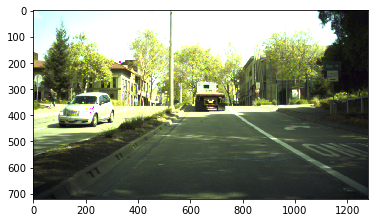

In [5]:
# test the get_all_labels function
from read_label_file import get_all_labels
records = get_all_labels('data/small.yaml')
image = cv2.imread(records[0]['path'])
image2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image2)

In [8]:
print("image width: %d, height: %d" % (image2.shape[1], image2.shape[0]))

image width: 1280, height: 720


In [7]:
from dataset_stats import quick_stats

quick_stats("data/train.yaml")

Number of images: 5093
Number of traffic lights: 10756 

Minimum width: 1.1224768885000458
Average width: 11.175106667325696
median width: 8.55396570789992
maximum width: 98.0 

Minimum height: 0.24943930860001728
Average height: 24.323216404050356
median height: 18.925365134599986
maximum height: 207.0 

Minimum size: 0.2799898589869501
Average size: 404.5161008940251
median size: 158.80036482309796
maximum size: 20286.0 

Labels:
	Green: 5207
	GreenStraightRight: 3
	RedRight: 5
	RedStraight: 9
	GreenLeft: 178
	Red: 3057
	GreenStraight: 20
	GreenRight: 13
	Yellow: 444
	GreenStraightLeft: 1
	occluded: 170
	off: 726
	RedStraightLeft: 1
	RedLeft: 1092


In [9]:
quick_stats("data/additional_train.yaml")

Number of images: 215
Number of traffic lights: 321 

Minimum width: 2.6784140969999726
Average width: 10.49663588059283
median width: 8.562471093899944
maximum width: 50.55242390080001 

Minimum height: 3.3806752036999796
Average height: 23.115198542372607
median height: 18.682917239999995
maximum height: 113.95715896280001 

Minimum size: 12.195633527246247
Average size: 325.2070630279684
median size: 164.51445263751657
maximum size: 5760.810606418317 

Labels:
	Green: 171
	GreenStraight: 1
	Yellow: 15
	occluded: 7
	off: 21
	GreenLeft: 3
	Red: 88
	RedLeft: 22


In [3]:
# test the read_bosch_dataset function
from create_tf_record import read_bosch_dataset
samples = read_bosch_dataset("data/small.yaml")
samples

reading data/small.yaml: 100%|██████████| 7/7 [00:00<00:00, 57.23samples/s]


[{'filename': '/home/zwlin/projects/CarND-Term3/final-project/detector/data/rgb/test/24068.png',
  'format': 'PNG',
  'height': 720,
  'width': 1280,
  'xmaxs': [0.5876953125],
  'xmins': [0.58515625],
  'ymaxs': [0.49322916666666666],
  'ymins': [0.47934027777777777]},
 {'filename': '/home/zwlin/projects/CarND-Term3/final-project/detector/data/rgb/test/24070.png',
  'format': 'PNG',
  'height': 720,
  'width': 1280,
  'xmaxs': [0.58798828125],
  'xmins': [0.58505859375],
  'ymaxs': [0.49201388888888886],
  'ymins': [0.4769097222222222]},
 {'filename': '/home/zwlin/projects/CarND-Term3/final-project/detector/data/rgb/test/24072.png',
  'format': 'PNG',
  'height': 720,
  'width': 1280,
  'xmaxs': [0.58896484375],
  'xmins': [0.5859375],
  'ymaxs': [0.4939236111111111],
  'ymins': [0.4810763888888889]},
 {'filename': '/home/zwlin/projects/CarND-Term3/final-project/detector/data/rgb/test/24074.png',
  'format': 'PNG',
  'height': 720,
  'width': 1280,
  'xmaxs': [0.589453125],
  'xmins':

In [4]:
# test the sample_to_tf_example function
from create_tf_record import sample_to_tf_example
example = sample_to_tf_example(samples[0])
example

features {
  feature {
    key: "image/encoded"
    value {
      bytes_list {
        value: "\211PNG\r\n\032\n\000\000\000\rIHDR\000\000\005\000\000\000\002\320\010\002\000\000\000@\037J\001\000\000 \000IDATx\001\354\301\331\317\345\371\235\037\364\327\347\373;\347<O-]\335\256v/\036\267\355YL\222\031Of\304r\201\304r\211r\203@\3422\022\377\r\027p\311?\000\027\334p\003\002!\261(\020\204\242\020\006\010\211g<\236q\354v\267\227vw\273\272\252ky\226s\316\357\373}S_\317\021\017\325\351h\354\311d\226\244^\257J\342#\336\342C\336\346G\274\303\017\371\n\357\362\253\374\001\177\215\337\3437\371&\277\305?\344\267\371\026\337\340\367\370M\276\311o\361\017\371m\276\311o\361M~\213o\362[\374\036\277\311\267\370\006\337\342\033\374\036\277\311\267\370\006\337\342\033\374>\277\301\267\371u\276\315\257\363m~\235\357\360W\370\016\177\205\357\362u\276\313\327\371G\374K|\227\257\363]\276\316w\371:\357\362\253|\237_\341{\374\032\337\347Wx\227_\345]~\225\367\370e\336\347k\274\307/\363>_\343\007|\225\037\360U